-----------------------
#### outlier detection with higher value of p
------------------------

In [1]:
import numpy as np
from scipy.spatial.distance import minkowski
import matplotlib.pyplot as plt

In [2]:
# Generate random data with outliers
np.random.seed(0)
data = np.random.randn(100, 2)
outliers = np.array([[4, 3], [3, 4]])
data_with_outliers = np.concatenate([data, outliers])

In [3]:
# Calculate custom Minkowski distances for different values of p
p_values = [3, 10, 20]
outlier_indices = []

In [4]:
def custom_distance(u, v, p):
    return np.sum(np.abs(v - u) ** p) ** (1 / p)

In [5]:
for outlier in outliers:
    distances = [custom_distance(outlier, point, p) for point in data_with_outliers]
    outlier_indices.append(np.argmin(distances))

NameError: name 'p' is not defined

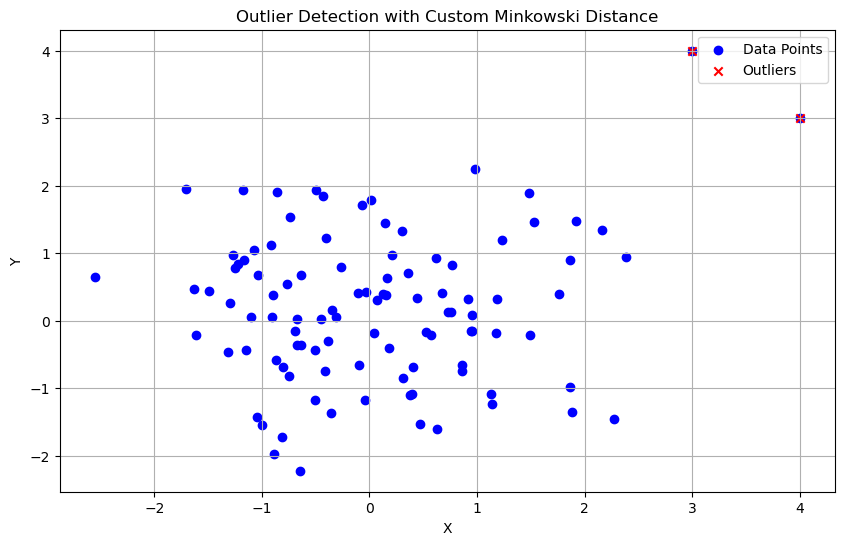

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], label='Data Points', color='blue')
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', color='red', marker='x')

for idx, p in zip(outlier_indices, p_values):
    plt.scatter(data_with_outliers[idx, 0], data_with_outliers[idx, 1], s=200, edgecolors='black', facecolors='none', label=f'P={p}')

plt.title('Outlier Detection with Custom Minkowski Distance')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

#### increasing p

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Generate random data with an outlier
np.random.seed(0)
data = np.random.randn(100, 2)
outlier = np.array([3, 3])

In [9]:
# Calculate Minkowski distances for different values of p
p_values = np.arange(1, 20)
distances = []

In [10]:
for p in p_values:
    distance = np.linalg.norm(data - outlier, ord=p, axis=1)
    distances.append(distance)

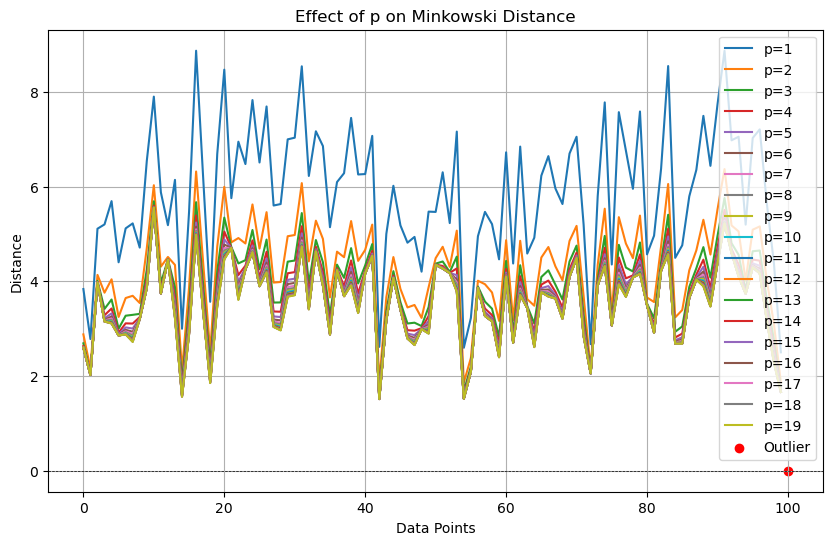

In [11]:
# Plotting
plt.figure(figsize=(10, 6))

for p, dist in zip(p_values, distances):
    plt.plot(dist, label=f'p={p}')

plt.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
plt.scatter(100, 0, color='red', label='Outlier')
plt.title('Effect of p on Minkowski Distance')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)

`Lower p`: When you use a lower value of "p," the Minkowski distance emphasizes larger differences in individual dimensions. This means that if you have larger differences in a specific dimension, the resulting Minkowski distance will be larger. This can lead to larger distances between points in certain cases.

`Higher p`: When you use a higher value of "p," the Minkowski distance emphasizes smaller differences in individual dimensions. This means that if you have small differences in a specific dimension, the resulting Minkowski distance will be smaller. This can lead to smaller distances between points in certain cases.

**In terms of outlier detection:**

- For lower values of "p," larger differences in dimensions can lead to larger distances, potentially making it easier to detect outliers that have extreme values in some dimensions.

- For higher values of "p," smaller differences in dimensions are emphasized, making it more sensitive to small differences and possibly leading to different points being considered outliers.